In [2]:
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns


%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [4]:
plydata = PlyData.read(r"earthquakes.ply")

# Compose Data

In [5]:
x_ = plydata.elements[0].data['x']
y_ = plydata.elements[0].data['y']
z_ = plydata.elements[0].data['z']

x_ = x_[:,np.newaxis]
y_ = y_[:,np.newaxis]
z_ = z_[:,np.newaxis]

data = np.concatenate((x_,y_,z_), axis=-1)

print(data.shape)


(521721, 3)


In [6]:
df = pd.DataFrame(data, columns=['x', 'y', 'z'])

In [7]:
df

,x,y,z
0,1.234752,-8.261918,63.452473
1,1.378754,-8.239111,63.452473
2,1.522337,-8.213793,63.452473
3,1.665455,-8.185974,63.452473
4,1.808066,-8.155661,63.452473
...,...,...,...
521716,-24.056047,-45.781185,37.447147
521717,-1.405685,-60.586395,14.881525
521718,21.979126,-53.987717,20.196550
521719,-34.131927,15.771598,45.916992


# Data Visualization

<IPython.core.display.Javascript object>


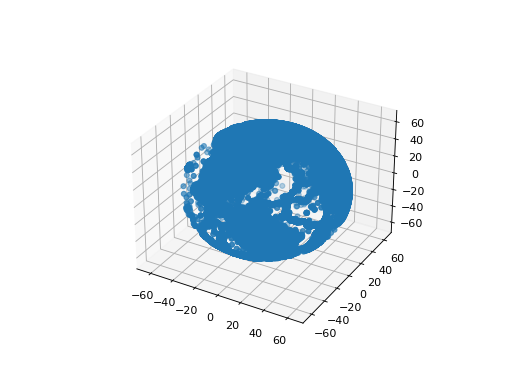

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_, y_, z_)
plt.show()

In [9]:
# # visualize
# figure = plt.figure()
# plt.scatter(x, y)
# plt.show()

In [10]:
# # visualize
# figure = plt.figure()
# plt.scatter(x, z)
# plt.show()

In [11]:
# # visualize
# figure = plt.figure()
# plt.scatter(y, z)
# plt.show()

# Sampling

In [12]:
sampled_df = df.sample(5000, random_state=1)
sampled_df

,x,y,z
122314,-47.047009,-1.006032,-17.653175
364253,-51.227921,0.211008,-36.686722
1681,-1.557955,25.472342,58.691845
216532,-49.590328,-0.891576,-38.862122
391323,-41.094662,30.791645,20.262899
...,...,...,...
429306,23.813396,-52.532162,19.856838
482483,-54.814587,-25.231401,21.277708
212801,-24.692944,-43.743443,39.673267
244996,-39.110664,-3.113794,50.373432


<IPython.core.display.Javascript object>


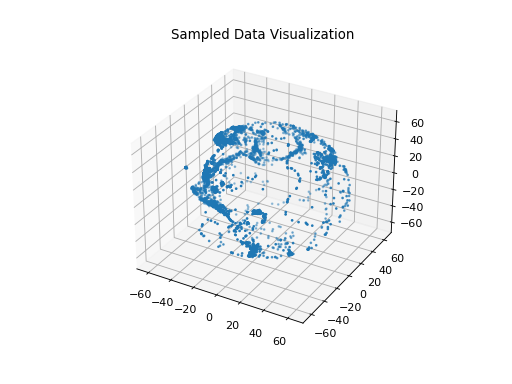

In [13]:
x = sampled_df['x']
y = sampled_df['y']
z = sampled_df['z']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=2)
plt.title('Sampled Data Visualization')
plt.show()


In [14]:
features = sampled_df

# Clustering

In [15]:
def evaluate(model, parameter_grid, data):
    best_score=-1
    for param in parameter_grid:
        model.set_params(**param)
        model.fit(data)
        if len(np.unique(model.labels_))>1: # ako brojot na klasterite mi e pogolem od 1
            curent_score = metrics.silhouette_score(data, model.labels_) # meram siluette_score na toj model so izbrani parametri
            print("Parameter : ", param, "Score :", curent_score)
            if curent_score>best_score: # ako skorot sto mi ja dava metrikata e pogolem od najdobriot skor
                best_score=curent_score
                best_grid=param
    print(best_grid)
    print(best_score)


## KMeans Clustering

<IPython.core.display.Javascript object>


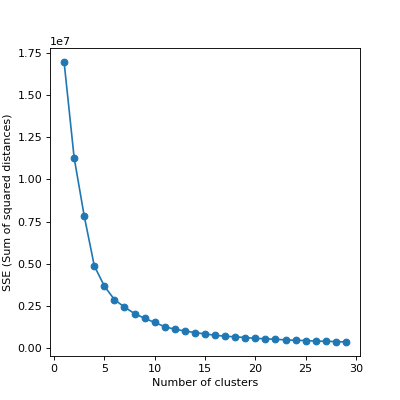

In [16]:
# Select the optimal number of clusters
sse = []
list_k = np.arange(1,30)   

X = sampled_df 

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)
   
plt.figure(figsize=(5,5))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')

plt.show()

#### Comment: 
Optimal number of clusters is > 5

In [17]:
# Tunning KMeans
list_clusters = np.arange(5, 21, 5)   

model = KMeans(random_state=0)
parameters = {'n_clusters' : list_clusters}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)
# todo parameter grid

Parameter :  {'n_clusters': 5} Score : 0.49605107
Parameter :  {'n_clusters': 10} Score : 0.55783314
Parameter :  {'n_clusters': 15} Score : 0.5859288
Parameter :  {'n_clusters': 20} Score : 0.5682581
{'n_clusters': 15}
0.5859288


#### Comment: 
Optimal number of clusters is between 10 and 20

In [29]:
# Fine Tunning KMeans
list_clusters = np.arange(10, 21, 1)   

model = KMeans(random_state=0)
parameters = {'n_clusters' : list_clusters}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)
# todo parameter grid

Parameter :  {'n_clusters': 10} Score : 0.55783314
Parameter :  {'n_clusters': 11} Score : 0.5743153
Parameter :  {'n_clusters': 12} Score : 0.58171767
Parameter :  {'n_clusters': 13} Score : 0.5856169
Parameter :  {'n_clusters': 14} Score : 0.58840674
Parameter :  {'n_clusters': 15} Score : 0.5859288
Parameter :  {'n_clusters': 16} Score : 0.5790574
Parameter :  {'n_clusters': 17} Score : 0.58408993
Parameter :  {'n_clusters': 18} Score : 0.5532447
Parameter :  {'n_clusters': 19} Score : 0.5647168
Parameter :  {'n_clusters': 20} Score : 0.5682581
{'n_clusters': 14}
0.58840674


KMeans Silhouette Score: 0.58840674


<IPython.core.display.Javascript object>


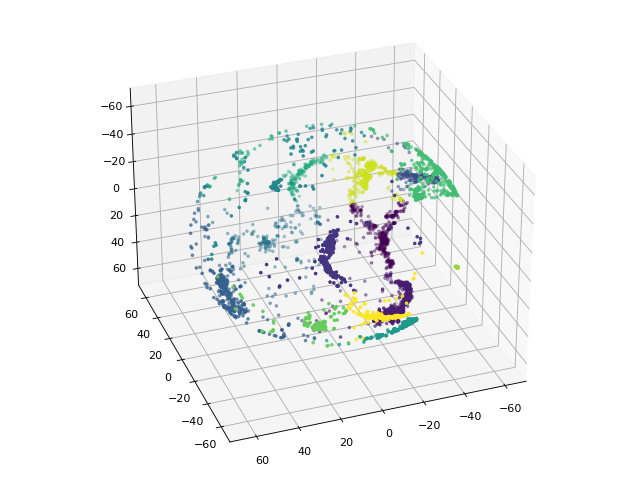

Text(0.5, 0.92, 'KMeans Visualization')

In [39]:
kmeans = KMeans(n_clusters=14, max_iter=3000, random_state=0)
kmeans_model = kmeans.fit(sampled_df)
labels_kmeans = kmeans_model.labels_

kmeans_score = metrics.silhouette_score(sampled_df, labels_kmeans)
print('KMeans Silhouette Score:', kmeans_score)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x,y,z,
            c=labels_kmeans,
            s=5)
plt.title('KMeans Visualization')

## DBScan Clustering

In [20]:
# Tunning DBSCAN

model = DBSCAN()

list_eps = np.arange(1, 51, 5)   
list_min_samples =  np.arange(5, 50, 5)   
parameters = {'eps': list_eps,
              'min_samples': list_min_samples}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)

Parameter :  {'eps': 1, 'min_samples': 5} Score : -0.008599671
Parameter :  {'eps': 1, 'min_samples': 10} Score : -0.098782316
Parameter :  {'eps': 1, 'min_samples': 15} Score : -0.22591841
Parameter :  {'eps': 1, 'min_samples': 20} Score : -0.20625615
Parameter :  {'eps': 1, 'min_samples': 25} Score : -0.13740963
Parameter :  {'eps': 1, 'min_samples': 30} Score : -0.20609584
Parameter :  {'eps': 1, 'min_samples': 35} Score : -0.2544287
Parameter :  {'eps': 1, 'min_samples': 40} Score : -0.29400736
Parameter :  {'eps': 1, 'min_samples': 45} Score : -0.2926505
Parameter :  {'eps': 6, 'min_samples': 5} Score : -0.3526642
Parameter :  {'eps': 6, 'min_samples': 10} Score : 0.035083238
Parameter :  {'eps': 6, 'min_samples': 15} Score : 0.15638113
Parameter :  {'eps': 6, 'min_samples': 20} Score : 0.2630774
Parameter :  {'eps': 6, 'min_samples': 25} Score : 0.41975674
Parameter :  {'eps': 6, 'min_samples': 30} Score : 0.48131713
Parameter :  {'eps': 6, 'min_samples': 35} Score : 0.4640769
Pa

#### Comment: 
Optimal parameter intervals: 
    eps: between 4 and 8
    min_samples: between 25 and 45

In [21]:
# Fine Tunning DBSCAN

model = DBSCAN()

list_eps = np.arange(4, 8, 0.25)   
list_min_samples =  np.arange(25, 45, 1)   
parameters = {'eps': list_eps,
              'min_samples': list_min_samples}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)

Parameter :  {'eps': 4.0, 'min_samples': 25} Score : 0.36972427
Parameter :  {'eps': 4.0, 'min_samples': 26} Score : 0.38982877
Parameter :  {'eps': 4.0, 'min_samples': 27} Score : 0.37266245
Parameter :  {'eps': 4.0, 'min_samples': 28} Score : 0.40237772
Parameter :  {'eps': 4.0, 'min_samples': 29} Score : 0.39986837
Parameter :  {'eps': 4.0, 'min_samples': 30} Score : 0.3978225
Parameter :  {'eps': 4.0, 'min_samples': 31} Score : 0.3899068
Parameter :  {'eps': 4.0, 'min_samples': 32} Score : 0.38355663
Parameter :  {'eps': 4.0, 'min_samples': 33} Score : 0.3688424
Parameter :  {'eps': 4.0, 'min_samples': 34} Score : 0.39042392
Parameter :  {'eps': 4.0, 'min_samples': 35} Score : 0.3697984
Parameter :  {'eps': 4.0, 'min_samples': 36} Score : 0.36337963
Parameter :  {'eps': 4.0, 'min_samples': 37} Score : 0.37157637
Parameter :  {'eps': 4.0, 'min_samples': 38} Score : 0.36202136
Parameter :  {'eps': 4.0, 'min_samples': 39} Score : 0.35109082
Parameter :  {'eps': 4.0, 'min_samples': 40}

Parameter :  {'eps': 5.5, 'min_samples': 33} Score : 0.4113309
Parameter :  {'eps': 5.5, 'min_samples': 34} Score : 0.4113309
Parameter :  {'eps': 5.5, 'min_samples': 35} Score : 0.3972021
Parameter :  {'eps': 5.5, 'min_samples': 36} Score : 0.40472153
Parameter :  {'eps': 5.5, 'min_samples': 37} Score : 0.40138438
Parameter :  {'eps': 5.5, 'min_samples': 38} Score : 0.40158737
Parameter :  {'eps': 5.5, 'min_samples': 39} Score : 0.40121132
Parameter :  {'eps': 5.5, 'min_samples': 40} Score : 0.4381126
Parameter :  {'eps': 5.5, 'min_samples': 41} Score : 0.43562207
Parameter :  {'eps': 5.5, 'min_samples': 42} Score : 0.43305868
Parameter :  {'eps': 5.5, 'min_samples': 43} Score : 0.42599902
Parameter :  {'eps': 5.5, 'min_samples': 44} Score : 0.4227321
Parameter :  {'eps': 5.75, 'min_samples': 25} Score : 0.480612
Parameter :  {'eps': 5.75, 'min_samples': 26} Score : 0.477887
Parameter :  {'eps': 5.75, 'min_samples': 27} Score : 0.4773262
Parameter :  {'eps': 5.75, 'min_samples': 28} S

Parameter :  {'eps': 7.0, 'min_samples': 41} Score : 0.48600698
Parameter :  {'eps': 7.0, 'min_samples': 42} Score : 0.4853293
Parameter :  {'eps': 7.0, 'min_samples': 43} Score : 0.4865124
Parameter :  {'eps': 7.0, 'min_samples': 44} Score : 0.4661996
Parameter :  {'eps': 7.25, 'min_samples': 25} Score : 0.0969205
Parameter :  {'eps': 7.25, 'min_samples': 26} Score : 0.09673625
Parameter :  {'eps': 7.25, 'min_samples': 27} Score : 0.109551735
Parameter :  {'eps': 7.25, 'min_samples': 28} Score : 0.107196204
Parameter :  {'eps': 7.25, 'min_samples': 29} Score : 0.22985981
Parameter :  {'eps': 7.25, 'min_samples': 30} Score : 0.2297019
Parameter :  {'eps': 7.25, 'min_samples': 31} Score : 0.23347753
Parameter :  {'eps': 7.25, 'min_samples': 32} Score : 0.41231358
Parameter :  {'eps': 7.25, 'min_samples': 33} Score : 0.4121484
Parameter :  {'eps': 7.25, 'min_samples': 34} Score : 0.41185966
Parameter :  {'eps': 7.25, 'min_samples': 35} Score : 0.41185966
Parameter :  {'eps': 7.25, 'min_s

DBSCAN Silhouette Score: 0.48762655


<IPython.core.display.Javascript object>


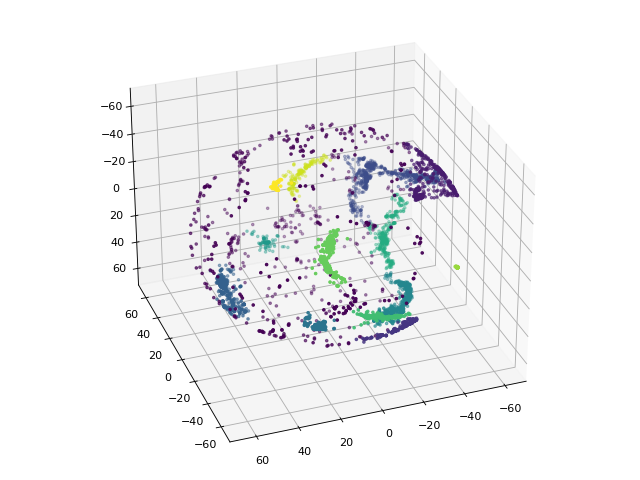

Text(0.5, 0.92, 'DBSCAN Visualization')

In [22]:
dbscan = DBSCAN(eps=7, min_samples=38)
dbscan_model = dbscan.fit(sampled_df)
labels_dbscan = dbscan_model.labels_

dbscan_score = metrics.silhouette_score(sampled_df, labels_dbscan)
print('DBSCAN Silhouette Score:', dbscan_score)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x,y,z,
            c=labels_dbscan,
            s=5)
plt.title('DBSCAN Visualization')

In [23]:
np.unique(labels_dbscan, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       dtype=int64),
 array([560, 369, 524, 678, 479, 299, 816,  78, 307, 179, 323, 173, 172,
         43], dtype=int64))

## Aglomerative Clustering

In [24]:
# Tunning AgglomerativeClustering

model = AgglomerativeClustering()

list_n_clusters =np.arange(1, 50, 10)   
list_linkage = ['ward', 'complete', 'average', 'single']

parameters = {'n_clusters': list_n_clusters,
                      'linkage': list_linkage}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)

Parameter :  {'linkage': 'ward', 'n_clusters': 11} Score : 0.55158645
Parameter :  {'linkage': 'ward', 'n_clusters': 21} Score : 0.5338282
Parameter :  {'linkage': 'ward', 'n_clusters': 31} Score : 0.5379964
Parameter :  {'linkage': 'ward', 'n_clusters': 41} Score : 0.5166415
Parameter :  {'linkage': 'complete', 'n_clusters': 11} Score : 0.3934196
Parameter :  {'linkage': 'complete', 'n_clusters': 21} Score : 0.48743477
Parameter :  {'linkage': 'complete', 'n_clusters': 31} Score : 0.47981417
Parameter :  {'linkage': 'complete', 'n_clusters': 41} Score : 0.48541617
Parameter :  {'linkage': 'average', 'n_clusters': 11} Score : 0.46730587
Parameter :  {'linkage': 'average', 'n_clusters': 21} Score : 0.5316219
Parameter :  {'linkage': 'average', 'n_clusters': 31} Score : 0.54810476
Parameter :  {'linkage': 'average', 'n_clusters': 41} Score : 0.535643
Parameter :  {'linkage': 'single', 'n_clusters': 11} Score : -0.39724264
Parameter :  {'linkage': 'single', 'n_clusters': 21} Score : -0.46

#### Comment: 
Optimal parameter intervals: 
    
    linkage: between 'ward' and 'average'
    
    n_clusters: between 1 and 20 for 'ward' and between 20 and 40 for 'average' linkage
   

In [25]:
# Fine Tunning AgglomerativeClustering

model = AgglomerativeClustering()

list_n_clusters =np.arange(1, 20, 1)   
list_linkage = ['ward']

parameters = {'n_clusters': list_n_clusters,
                      'linkage': list_linkage}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)

Parameter :  {'linkage': 'ward', 'n_clusters': 2} Score : 0.32907763
Parameter :  {'linkage': 'ward', 'n_clusters': 3} Score : 0.37237433
Parameter :  {'linkage': 'ward', 'n_clusters': 4} Score : 0.4167482
Parameter :  {'linkage': 'ward', 'n_clusters': 5} Score : 0.41758993
Parameter :  {'linkage': 'ward', 'n_clusters': 6} Score : 0.44420478
Parameter :  {'linkage': 'ward', 'n_clusters': 7} Score : 0.466613
Parameter :  {'linkage': 'ward', 'n_clusters': 8} Score : 0.47393048
Parameter :  {'linkage': 'ward', 'n_clusters': 9} Score : 0.49839854
Parameter :  {'linkage': 'ward', 'n_clusters': 10} Score : 0.5075563
Parameter :  {'linkage': 'ward', 'n_clusters': 11} Score : 0.55158645
Parameter :  {'linkage': 'ward', 'n_clusters': 12} Score : 0.5597516
Parameter :  {'linkage': 'ward', 'n_clusters': 13} Score : 0.5671456
Parameter :  {'linkage': 'ward', 'n_clusters': 14} Score : 0.5774137
Parameter :  {'linkage': 'ward', 'n_clusters': 15} Score : 0.5669639
Parameter :  {'linkage': 'ward', 'n_

In [26]:
# Fine Tunning AgglomerativeClustering

model = AgglomerativeClustering()

list_n_clusters =np.arange(20, 40, 1)   
list_linkage = ['average']

parameters = {'n_clusters': list_n_clusters,
                      'linkage': list_linkage}

parameter_grid = ParameterGrid(parameters)
data = sampled_df
evaluate(model, parameter_grid, data)

Parameter :  {'linkage': 'average', 'n_clusters': 20} Score : 0.5339198
Parameter :  {'linkage': 'average', 'n_clusters': 21} Score : 0.5316219
Parameter :  {'linkage': 'average', 'n_clusters': 22} Score : 0.5310375
Parameter :  {'linkage': 'average', 'n_clusters': 23} Score : 0.527887
Parameter :  {'linkage': 'average', 'n_clusters': 24} Score : 0.5249801
Parameter :  {'linkage': 'average', 'n_clusters': 25} Score : 0.51716083
Parameter :  {'linkage': 'average', 'n_clusters': 26} Score : 0.5196085
Parameter :  {'linkage': 'average', 'n_clusters': 27} Score : 0.5327523
Parameter :  {'linkage': 'average', 'n_clusters': 28} Score : 0.53283757
Parameter :  {'linkage': 'average', 'n_clusters': 29} Score : 0.53256863
Parameter :  {'linkage': 'average', 'n_clusters': 30} Score : 0.533459
Parameter :  {'linkage': 'average', 'n_clusters': 31} Score : 0.54810476
Parameter :  {'linkage': 'average', 'n_clusters': 32} Score : 0.5477954
Parameter :  {'linkage': 'average', 'n_clusters': 33} Score : 

Agglomerative Clustering Silhouette Score: 0.5774137


<IPython.core.display.Javascript object>


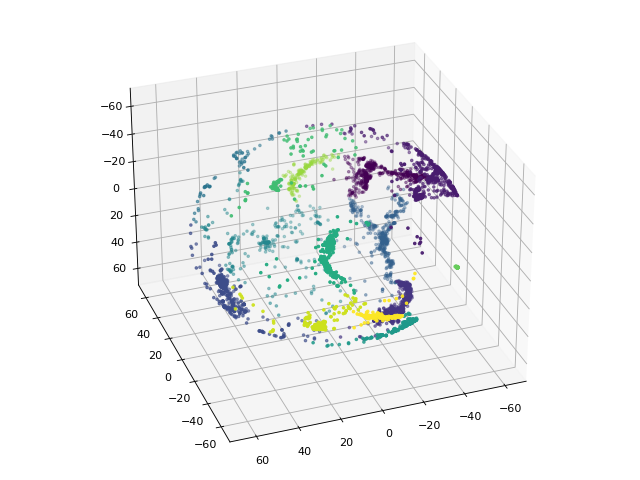

Text(0.5, 0.92, 'Agglomerative Clustering Visualization')

In [27]:
aggloclus = AgglomerativeClustering(n_clusters=14, linkage='ward')
aggloclus_model = aggloclus.fit(sampled_df)
labels_aggloclus = aggloclus_model.labels_

aggloclus_score = metrics.silhouette_score(sampled_df, labels_aggloclus)
print('Agglomerative Clustering Silhouette Score:', aggloclus_score)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x,y,z,
            c=labels_aggloclus,
            s=5)
plt.title('Agglomerative Clustering Visualization')

### Conclussion

In [40]:
all_scores = pd.DataFrame()
all_scores['Cluster'] = ['KMeans', 'DBScan', 'Agglomerative']
all_scores['Silhouette Score'] = [kmeans_score, dbscan_score, aggloclus_score]

all_scores


,Cluster,Silhouette Score
0,KMeans,0.588407
1,DBScan,0.487627
2,Agglomerative,0.577414


#### Comments:
   * All three algorithms emphasize that the dataset can be described the best with 14 clusters, meaning there are 14 fault lines on Earth 
   * KMeans and Agglomerative cluster the data with a score > 0.55, while DBScan's score is < 0.5
   * Among the three algorithms, KMeans clusters the data with highest Silhouette Score

## KMeans Clustering on whole dataset

In [32]:
kmeans_df = KMeans(n_clusters=14, max_iter=1000)
kmeans_df_model = kmeans_df.fit(df)
labels_kmeans_df = kmeans_df_model.labels_

In [33]:
kmeans_df_score = metrics.silhouette_score(df, labels_kmeans_df)
print('KMeans Silhouette Score:', kmeans_df_score)

KMeans Silhouette Score: 0.5764914


<IPython.core.display.Javascript object>


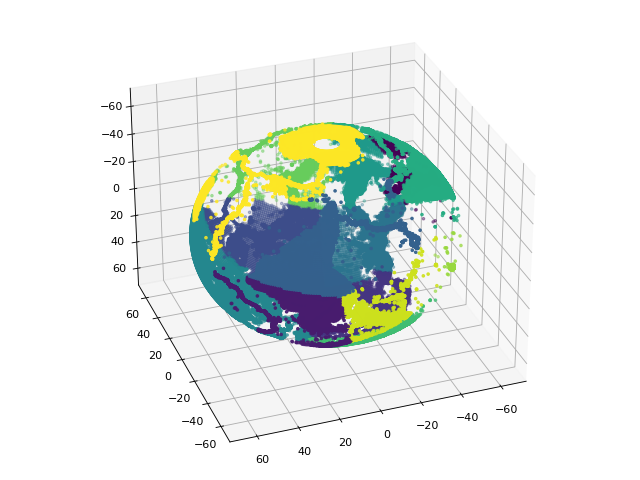

Text(0.5, 0.92, 'KMeans Visualization')

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x_,y_,z_,
            c=labels_kmeans_df,
            s=5)
plt.title('KMeans Visualization')